In [1]:
# Importing all necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
# Reading the Training  & testing CSV File
train_df= pd.read_csv('train_BRCpofr.csv')
test_df=pd.read_csv('test_koRSKBP.csv')

In [10]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [13]:
train_df.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [11]:
test_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [14]:
test_df.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver
59594,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum


# Data Preprocessing

In [3]:
train_df.shape

(89392, 12)

In [16]:
test_df.shape

(59595, 11)

In [85]:
train= train_df.copy()
test= test_df.copy()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


### So there are no null  or missing values in our Dataset

In [26]:
cat=[]
num=[]
for i in train.columns:
    if train[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)
        
print('our categorical variables are', cat)
print('our numerical variables are', num)

our categorical variables are ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']
our numerical variables are ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']


In [28]:
train_cat= train[cat]

In [32]:
train_cat.head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


In [30]:
train_num= train[num]

In [31]:
train_num.head()

,id,marital_status,vintage,claim_amount,cltv
0,1,1,5,5790,64308
1,2,0,8,5080,515400
2,3,1,8,2599,64212
3,4,0,7,0,97920
4,5,1,6,3508,59736


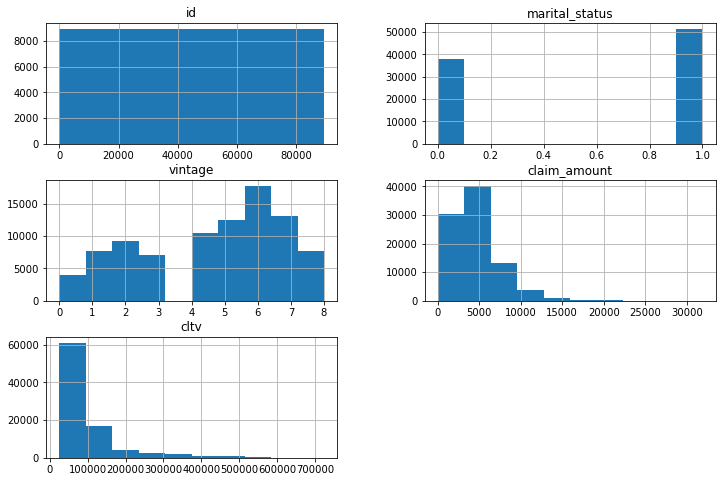

In [38]:
train.hist(figsize=(12,8));

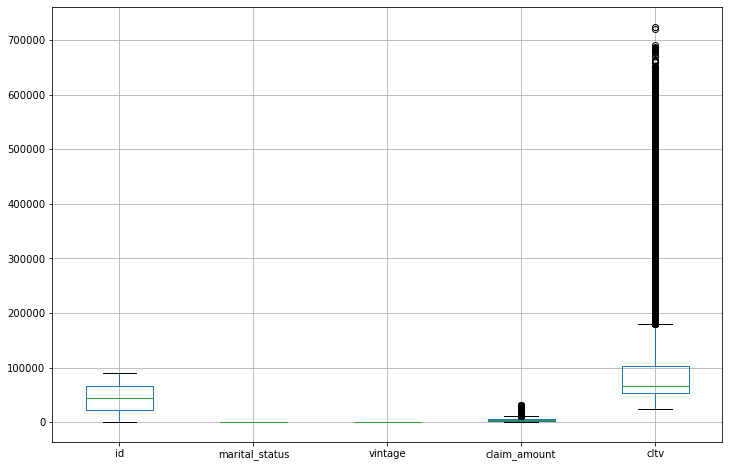

In [39]:
train.boxplot(figsize=(12,8));

In [40]:
# We can clearly see some outliers in claim-amount and Cltv column 

In [45]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


<AxesSubplot:>

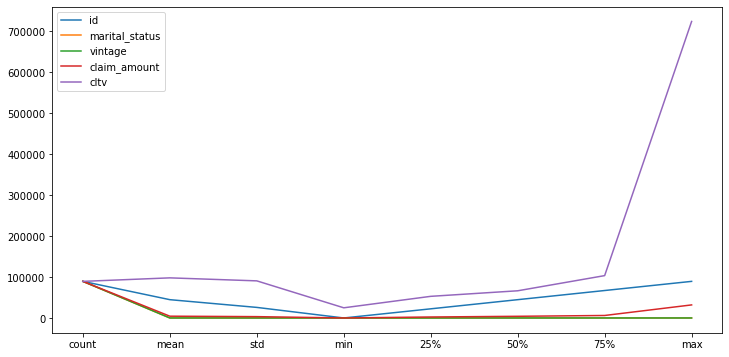

In [50]:
train.describe().plot(figsize=(12,6))

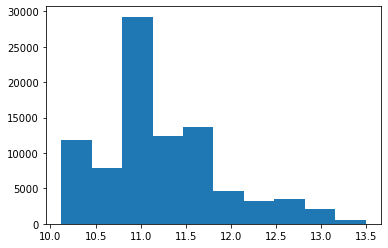

In [67]:
plt.hist(np.log(train_df.cltv));



In [68]:
#lets check values counts

In [69]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

<AxesSubplot:>

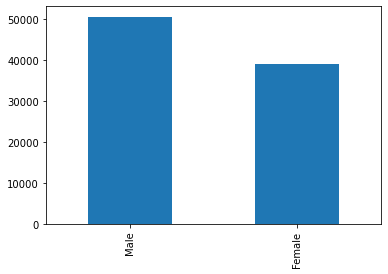

In [70]:
train.gender.value_counts().plot(kind='bar')

<AxesSubplot:>

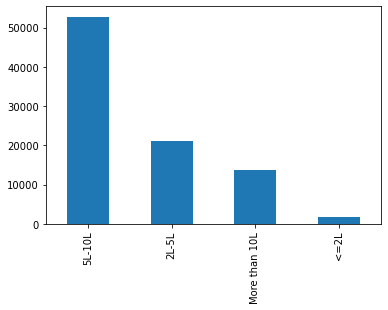

In [71]:
train.income.value_counts().plot(kind='bar')

<AxesSubplot:>

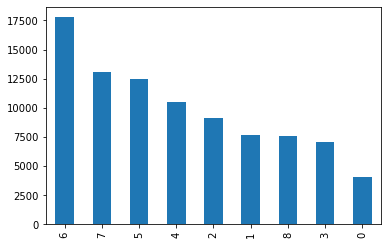

In [72]:
train.vintage.value_counts().plot(kind='bar')

<AxesSubplot:>

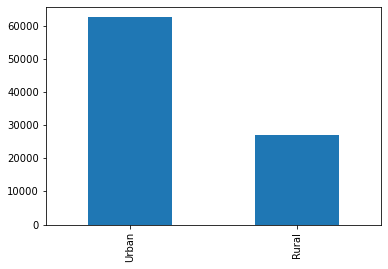

In [73]:
train.area.value_counts().plot(kind='bar')

<AxesSubplot:>

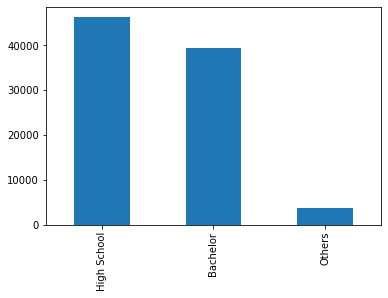

In [74]:
train.qualification.value_counts().plot(kind='bar')

<AxesSubplot:>

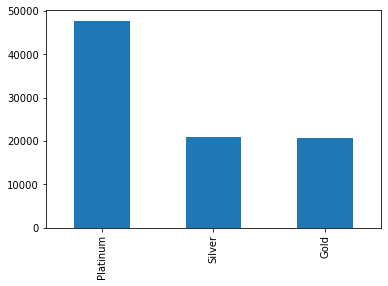

In [75]:
train.type_of_policy.value_counts().plot(kind='bar')

<AxesSubplot:>

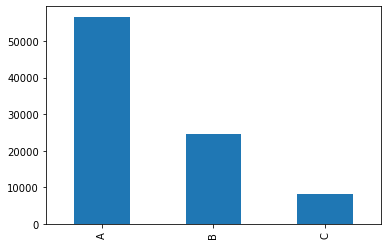

In [76]:
train.policy.value_counts().plot(kind='bar')

C:\Users\91801\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount', ylabel='cltv'>

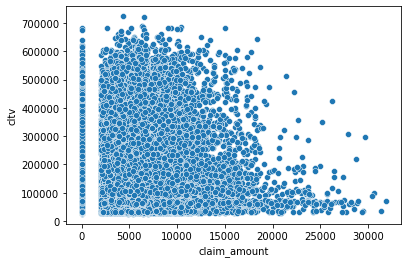

In [81]:
sns.scatterplot(train.claim_amount,train.cltv,hue='')

<AxesSubplot:>

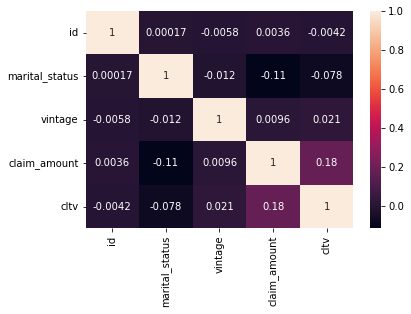

In [82]:
sns.heatmap(train.corr(),annot=True)

In [83]:
# we can see claim amount have weak positive correlation with cltv

# Handle Categorical Columns

In [84]:
train_cat.head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


In [86]:
# Lets apply label_encoding on gender,area,num_policies
# lets apply ordinal encoding on Qualification,income, policy and type of policy


In [6]:
from sklearn.preprocessing import LabelEncoder
  
label_encoder = LabelEncoder()

In [86]:
train['gender']= label_encoder.fit_transform(train['gender'])
train['area']= label_encoder.fit_transform(train['area'])
train['qualification']= label_encoder.fit_transform(train['qualification'])
train['num_policies']= label_encoder.fit_transform(train['num_policies'])
train['income']= label_encoder.fit_transform(train['income'])
train['policy']= label_encoder.fit_transform(train['policy'])
train['type_of_policy']= label_encoder.fit_transform(train['type_of_policy'])


In [87]:
test['gender']= label_encoder.fit_transform(test['gender'])
test['area']= label_encoder.fit_transform(test['area'])
test['qualification']= label_encoder.fit_transform(test['qualification'])
test['num_policies']= label_encoder.fit_transform(test['num_policies'])
test['income']= label_encoder.fit_transform(test['income'])
test['policy']= label_encoder.fit_transform(test['policy'])
test['type_of_policy']= label_encoder.fit_transform(test['type_of_policy'])

In [96]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736


In [113]:
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,0,0,1,1,0,6,2134,1,1,2
1,89394,0,1,1,0,0,4,4102,1,0,1
2,89395,1,0,1,1,1,7,2925,1,1,0
3,89396,0,0,0,3,1,2,0,1,1,2
4,89397,0,1,1,0,0,5,14059,1,1,2


In [88]:
test=test.drop(['id','gender'],axis=1)

In [48]:
test.shape

(57084, 9)

In [49]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,0,1,1,5,5790,1,0,1,64308
1,1,0,1,1,0,8,5080,1,0,1,515400
2,1,1,0,1,1,8,2599,1,0,1,64212
3,0,0,1,1,0,7,0,1,0,1,97920
4,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...
89387,1,0,1,3,0,6,0,1,1,1,95736
89388,1,1,0,1,1,0,3897,1,0,1,67596
89389,0,1,0,1,0,4,3363,1,1,1,114120
89390,0,0,1,0,0,8,0,1,1,1,71772


In [89]:
df=train.drop(['id','gender'],axis=1)


In [90]:
test['claim_amount']= np.log(test['claim_amount']+1)

In [52]:
df.shape

(85655, 10)

In [91]:
X= df.drop('cltv',axis=1)
y=df.cltv

In [92]:
X['claim_amount']=np.log(train['claim_amount']+1)
X.head()

,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,0,1,1,5,8.664060,1,0,1
1,0,1,1,0,8,8.533263,1,0,1
2,1,0,1,1,8,7.863267,1,0,1
3,0,1,1,0,7,0.000000,1,0,1
4,1,1,3,1,6,8.163086,1,0,0


In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [96]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)


C:\Users\91801\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [110]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)
importances = clf.feature_importances_

# sort the importances and get the indices of the top half
sorted_indices = np.argsort(importances)[::-1]
top_half_indices = sorted_indices[:int(X.shape[1]/2)]

# select the top half features
X_new = X[:, top_half_indices]

InvalidIndexError: (slice(None, None, None), array([5, 6, 4, 8], dtype=int64))

In [98]:
X_new.shape

(89392, 3)

# Train test Split

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.33, random_state=42)

In [56]:
X_train.shape

(57388, 9)

In [57]:
X_test.head()

,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
1902,0,0,1,0,4,8.057061,1,0,0
71031,1,1,0,1,2,8.589328,0,2,0
60018,1,1,1,1,5,8.578100,0,0,2
55830,1,1,1,1,6,9.246576,1,0,1
88010,1,1,1,1,5,8.346642,1,0,1


In [250]:
test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0,0,1,1,0,6,2134,1,1,2
1,0,1,1,0,0,4,4102,1,0,1
2,1,0,1,1,1,7,2925,1,1,0
3,0,0,0,3,1,2,0,1,1,2
4,0,1,1,0,0,5,14059,1,1,2


In [251]:
test.shape

(59595, 10)

# Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [101]:
sc=MinMaxScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [60]:

main= sc.transform(test)


In [257]:
main

array([[-1.13849807, -1.51087644,  0.709051  , ...,  0.69173017,
         0.83911041,  1.45688694],
       [-1.13849807,  0.66186749,  0.709051  , ...,  0.69173017,
        -0.69507535, -0.01031559],
       [ 0.87835019, -1.51087644,  0.709051  , ...,  0.69173017,
         0.83911041, -1.47751813],
       ...,
       [-1.13849807,  0.66186749,  0.709051  , ...,  0.69173017,
         0.83911041, -0.01031559],
       [ 0.87835019, -1.51087644, -1.05558169, ...,  0.69173017,
        -0.69507535,  1.45688694],
       [-1.13849807,  0.66186749, -1.05558169, ...,  0.69173017,
         0.83911041, -0.01031559]])

In [102]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear regression

In [125]:
model = LinearRegression()
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [129]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.15037833983764826
MAE 50931.54487967392


### Ridge Regression

In [130]:
model = Ridge(alpha=10)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [131]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.15037835075005623
MAE 50930.91444048443


# Lasso Regression

In [137]:
model = Lasso(alpha=0.001)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [138]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.15037834000679318
MAE 50931.5446188714


### KNN

In [145]:
model = KNeighborsRegressor(n_neighbors=100)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [146]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.15177638427140383
MAE 50178.50761627118


### Decision Tree

In [103]:
model= DecisionTreeRegressor(max_depth=7)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [104]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.1463162050074297
MAE 50378.87419770459


### SVM

In [163]:
model= SVR(kernel='rbf',C=10000,epsilon=0.1)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [164]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.042354215559249786
MAE 43398.09071398235


### Random Forest

In [105]:
model= RandomForestRegressor(n_estimators=500,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=8)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.1518546713820942
MAE 50228.90588939159


### AdaBoost

In [178]:
model=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [179]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -0.3882538273609859
MAE 86325.49446000316


In [ ]:
# Gradient Boost

In [182]:
model= GradientBoostingRegressor(n_estimators=600)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [183]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.15007564505937077
MAE 50148.107900577386


### XgBoost

In [107]:
model=XGBRegressor(n_estimators=300,max_depth=3,learning_rate=0.05,subsample=0.7,colsample_bytree=0.5)
model.fit(X_train_sc,y_train)
y_pred= model.predict(X_test_sc)

In [108]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.149305250413179
MAE 50704.30472007415


In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X.values,y.values,cv=10)

In [67]:
print('Score',np.mean(score))

Score 0.19459485250792027


# Output

In [68]:
y_pred= model.predict(main)

In [69]:
new_op= pd.Series(y_pred,name='cltv')

In [70]:
new_op.to_csv("output1.csv")

<AxesSubplot:>

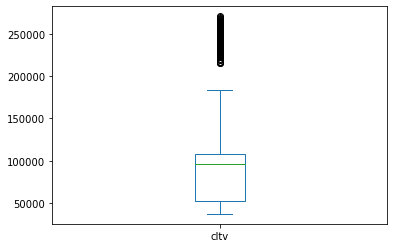

In [72]:
new_op.plot(kind='box')

In [73]:
new_op.isnull().sum()

0

In [74]:
new_op.describe()

count     57084.000000
mean      88682.375000
std       32276.205078
min       37082.320312
25%       51947.473633
50%       96561.968750
75%      108304.210938
max      270957.468750
Name: cltv, dtype: float64